In [91]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import math

In [2]:
def make_df(csvpath='ppchris.csv'):
    return pd.read_csv(os.path.join('.', csvpath))


In [145]:
gptdf = make_df('gpt3_results_full_clean_2.csv')
# gptdf['GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()] = \
#     gptdf['GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()].fillna(value=' ')
ppdf = make_df('ppfull.csv')
# ppdf['HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()] = \
#     ppdf['HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()].fillna(value=' ', inplace=True)

In [178]:
gptdf.columns

Index(['ID', 'GD1', 'GD2', 'GD3', 'GD4', 'GR1', 'GR2', 'GR3', 'GR4', 'Inc',
       'Hisp', 'Ideo', 'Age', 'PID7', 'PID3_p', 'WHITE', 'Gender', 'dkR',
       'dkD', 'GD1glove', 'GD2glove', 'GD3glove', 'GD4glove', 'GR1glove',
       'GR2glove', 'GR3glove', 'GR4glove'],
      dtype='object')

In [146]:
ppdf.drop('HDans HRans GenR GenD'.split(), axis=1, inplace=True)
gptdf = gptdf.join(ppdf.set_index('ID'), on='ID').drop('\
        HD1 HD2 HD3 HD4 \
        HR1 HR2 HR3 HR4 \
        '.split(), axis=1)

In [9]:
def loadGloveModel(File = "/home/crytting/Downloads/glove.6B.300d.txt"):
    """
    load glove embeddings in to a dictionary
    """
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in tqdm(f):
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

glove_dic = loadGloveModel("/home/crytting/Downloads/glove.6B.300d.txt")

1054it [00:00, 10526.53it/s]

Loading Glove Model


400000it [00:29, 13472.98it/s]

400000  words loaded!


In [147]:
def glove_word(word, glove_dic):
    """
    Return the glove embedding of a word, unless it's not in the dic, in which
    case return zeros
    """
    try:
        embed = glove_dic[word]
        return embed
    except:
        return np.zeros(300)
    

def apply_glove_model(phrase, glove_dic):
    """
    Get glove embedding from word or """
    try:
        toks = phrase.strip().split()
    except:
        if math.isnan(phrase):
            return np.NaN
        pass
    
    if len(toks) == 0:
        return glove_word("", glove_dic)
    
    if len(toks) == 1:
        return glove_word(toks[0], glove_dic)
    else:
        embeds = []
        for tok in toks:
            embeds.append(glove_word(tok, glove_dic)) 
    
        mean = np.mean(np.stack(embeds), axis=0)
        if isinstance(mean, float):
            print(mean)
        return mean


def generate_glove_col(df, col, glove_dic = None):
    if isinstance(glove_dic, str):
        glove_dic = loadGloveModel(glove_dic)
    values = df[col].str.lower().values
    result = [apply_glove_model(v, glove_dic) for v in values]
    df[col + "glove"] = result
    
# def avg_glove_cols(df, cols):
#     df = df[cols]
#     df.mean()
    

# def average_glove(df, cols):
#     dcols = cols[:4]
#     print(dcols)
#     rcols = cols[4:]
#     minid = df[dcols].head()
#     print(minid.head())
    
#     print(np.expand_dims(minid.as_matrix(), axis=1).mean()
#     df['glove_mean_D'] = df[dcols].mean(axis=0)
#     df['glove_mean_R'] = df[rcols].mean(axis=0)
#     sys.exit()
    

def process_gptdf(df, glove_dic=None):
    cols = 'GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()
    for col in cols:
        generate_glove_col(df, col, glove_dic)
    glove_cols = [col + 'glove' for col in cols]
#     average_glove(df, glove_cols)
        
def process_ppdf(df, glove_dic=None):
    cols = 'HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()
    for col in cols:
        generate_glove_col(df, col, glove_dic)
    glove_cols = [col + 'glove' for col in cols]
#     average_glove(df, glove_cols)

def ext

In [148]:
process_gptdf(gptdf, glove_dic=glove_dic)
process_ppdf(ppdf, glove_dic=glove_dic)

In [154]:
def generate_tsne(vecs):
    model = TSNE(n_components=2, random_state=0)
    result = model.fit_transform(vecs)
    df[col + "tsne_x"] = result[:,0]
    df[col + "tsne_y"] = result[:,1]


(2024,)


ValueError: setting an array element with a sequence.

In [177]:
np.vstack(gptdf['GD1glove'].dropna().values)
np.vstack(gptdf[''])

2019

In [46]:
gptdf.columns

Index(['ID', 'GPTD_1', 'GPTD_2', 'GPTD_3', 'GPTD_4', 'GPTR_1', 'GPTR_2',
       'GPTR_3', 'GPTR_4', 'Inc', 'Hisp', 'Ideo', 'Age', 'PID7', 'PID3_p',
       'WHITE', 'Gender', 'dkR', 'dkD'],
      dtype='object')

In [47]:
ppdf.columns

Index(['ID', 'Inc', 'Hisp', 'Ideo', 'Age', 'GenD_1', 'GenD_2', 'GenD_3',
       'GenD_4', 'GenR_1', 'GenR_2', 'GenR_3', 'GenR_4', 'PID7', 'PID3_p',
       'WHITE', 'Gender', 'dkR', 'dkD'],
      dtype='object')

In [141]:
n= pd.DataFrame({"f": "Chris Parker Chris".split(), "l": "Rytting Rogers Sypherd".split()})

In [144]:
for col in 'f l'.split():
    n[col + "_"] = n[col] + "___"

In [157]:
n['f'].iloc[2] = 3

,f,l,f_,l_
0,Chris,Rytting,Chris___,Rytting___
1,Parker,Rogers,Parker___,Rogers___
2,3,Sypherd,Chris___,Sypherd___


In [196]:
n['f'][~n.applymap(type).eq(str)['f']].index

Int64Index([2], dtype='int64')

In [207]:
n[:2]

,f,l,f_,l_
0,Chris,Rytting,Chris___,Rytting___
1,Parker,Rogers,Parker___,Rogers___


In [288]:
tmp1 = []
for row in gptdf['GD1'].items():
    tmp1.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp2 = []
for row in gptdf['GD2'].items():
    tmp2.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp3 = []
for row in gptdf['GD3'].items():
    tmp3.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp4 = []
for row in gptdf['GD4'].items():
    tmp4.append( glove_word(str(row[1]).lower().strip(), glove_dic) )
      
    
    #    tmp.append( glove_word(row[1].lower().strip(), glove_dic) + glove_word(row[2].lower().strip(), glove_dic) + glove_word(row[3].lower().strip(), glove_dic) + glove_word(row[4].lower().strip(), glove_dic))
#np.atleast_2d(gptdf['GD1glove'])
ddata2 = np.atleast_2d(tmp1) + np.atleast_2d(tmp2) +np.atleast_2d(tmp3) +np.atleast_2d(tmp4)
print(ddata2.shape)

(2024, 300)


In [226]:
gptdf

,ID,GD1,GD2,GD3,GD4,GR1,GR2,GR3,GR4,Inc,...,Ideo,Age,PID7,PID3_p,WHITE,Gender,dkR,dkD,GD1glove,newcol
0,R_7OmqZMur4R7ThQ1,Liberal,open-minded,intellectual,caring,Conservative,White,Racist,Disgust,$50K to $75K,...,Moderate/Haven't thought about it,51.0,Ind,Independent (excludes leaners),White,Male,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
1,R_832fxdV4QEySr6B,Liberal,Progressive,Religious,Virtuous,"traditional, religious","white, wealthy",male,and politically conservative,$25K to $50K,...,Moderate/Haven't thought about it,38.0,Lean R,Republicans,White,Female,1,1,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
2,R_87mU7Bcjh4Iz1zf,Urban,Religious,Liberal,Children,"White, male","heterosexual, Christian",conservative,old,$100K to $150K,...,Moderate/Haven't thought about it,53.0,Weak D,Democrat,Non-white,Male,1,1,"[0.086901, -0.26049, 0.46284, 0.16332, 0.40226...","[0.086901, -0.26049, 0.46284, 0.16332, 0.40226..."
3,R_8B5ArZjGtWzEklv,Liberal,Atheistic,Pro-gay marriage,Pro-choice,White,male,Christian,heterosexual,$150K to $200K,...,Slightly conservative,67.0,Weak R,Republicans,White,Male,0,0,"[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095...","[-0.11659, -0.37904, 0.15277, 0.02954, 0.25095..."
4,R_8BA7rctBCweoRHn,kind,compassionate,caring,giving and generous,Racist,Bigot,Homophobic,Gun lover,$50K to $75K,...,Liberal,27.0,Weak D,Democrat,White,Male,0,0,"[-0.11084, -0.018164, 0.059683, -0.23022, 0.17...","[-0.11084, -0.018164, 0.059683, -0.23022, 0.17..."
5,R_8H3DMVLRvZVemP3,Smart,educated,independent,UNBIASED,Religious,Conservative,Intelligent,Racist,$200K to $250K,...,Moderate/Haven't thought about it,62.0,Weak D,Democrat,White,Female,0,0,"[0.07848, -0.13317, -0.0079609, -0.62354, 0.47...","[0.07848, -0.13317, -0.0079609, -0.62354, 0.47..."
6,R_uq8oeVKbAPNvTlD,"Poor (you know, because I have no money in the...",Liberal (because I believe in social justice a...,Gay (because I'm a homosexual),Women (because I am a woman),Religious,Conservative,White,Male,$75K to $100K,...,Slightly conservative,12.0,Weak D,Democrat,White,Female,0,0,"[-0.08153818181818182, 0.06533718181818184, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,R_zYHIvcdvr2q9ZgB,Liberal (in a bad way),Out of touch,Supportive of big government,Supportive of big spending,Morality - Most Republicans believe that tradi...,Hard work - Republicans believe that the only ...,Community - Republicans believe that the commu...,NaN,$200K to $250K,...,Conservative,13.0,Strong R,Republicans,White,Male,0,0,"[-0.020978000000000007, -0.08238419999999999, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,R_2amlmGBwctqJbbY,Leftist - any person that believes that the go...,Liberal - any person that believes that the go...,Big Government - any person that thinks that t...,Intolerant - any person that believes the fede...,Racist,Ignorant,Homophobic,Anti-woman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,"[-0.09831282631578947, 0.16892994736842104, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,R_1N3nSfN95oRVCcZ,Open-minded,Progressive,Civil rights,Social justice,"White, male","Christian, straight",middle-class,conservative,$75K to $100K,...,Liberal,30.0,Strong D,Democrat,White,Male,0,0,"[-0.44176, -0.038171, -0.088209, -0.27945, 0.1...","[-0.44176, -0.038171, -0.088209, -0.27945, 0.1..."


In [228]:
ddata = np.atleast_2d(tmp)

In [229]:
ddata.shape


(2024, 300)

In [230]:
model = TSNE(n_components=2,random_state=0)
result =model.fit_transform(ddata)

In [231]:
result.shape

(2024, 2)

In [232]:
plt.scatter( result[:,0], result[:,1], s=0.1)

NameError: name 'plt' is not defined

In [233]:
%matplotlib inline

In [251]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

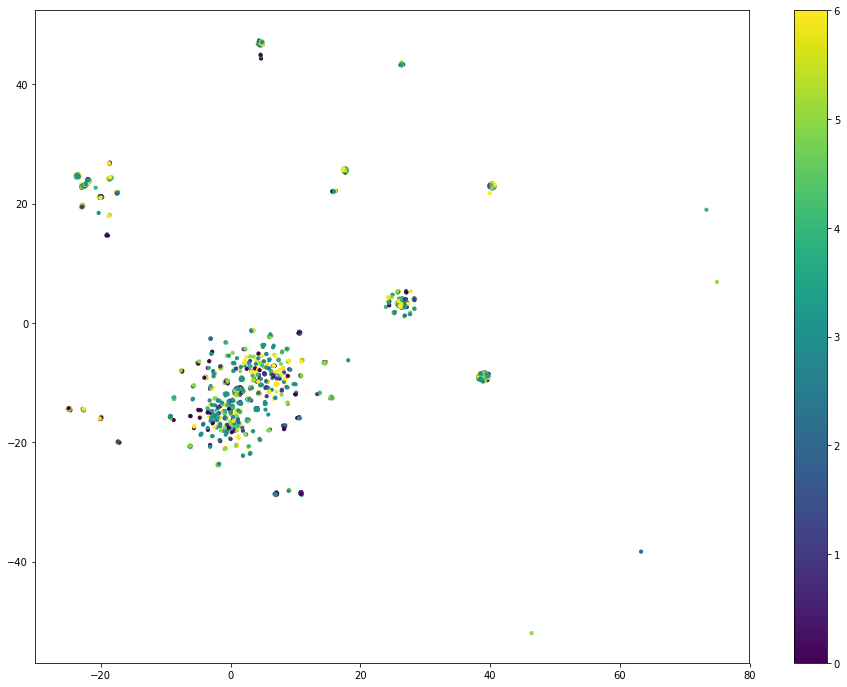

In [273]:
plt.scatter( result[:,0]+0.1*np.random.randn(2024), result[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

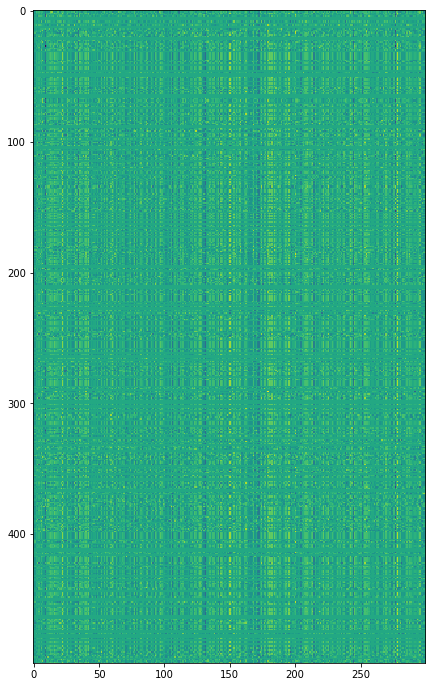

In [254]:
plt.imshow(ddata[1:500,:])

In [258]:
gptdf['PID7'].unique()


array(['Ind', 'Lean R', 'Weak D', 'Weak R', 'Strong R', nan, 'Strong D',
       'Lean D'], dtype=object)

In [264]:
mapper = {
    'Strong R':0,
    'Weak R':1,
    'Lean R':2,
    'Ind':3,
    'Lean D':4,
    'Weak D':5,
    'Strong D':6,
    np.nan:3,
}
pid_ints = []
for row in gptdf['PID7'].items():
    pid_ints.append(mapper[row[1]])


In [311]:
jitter = 0.1

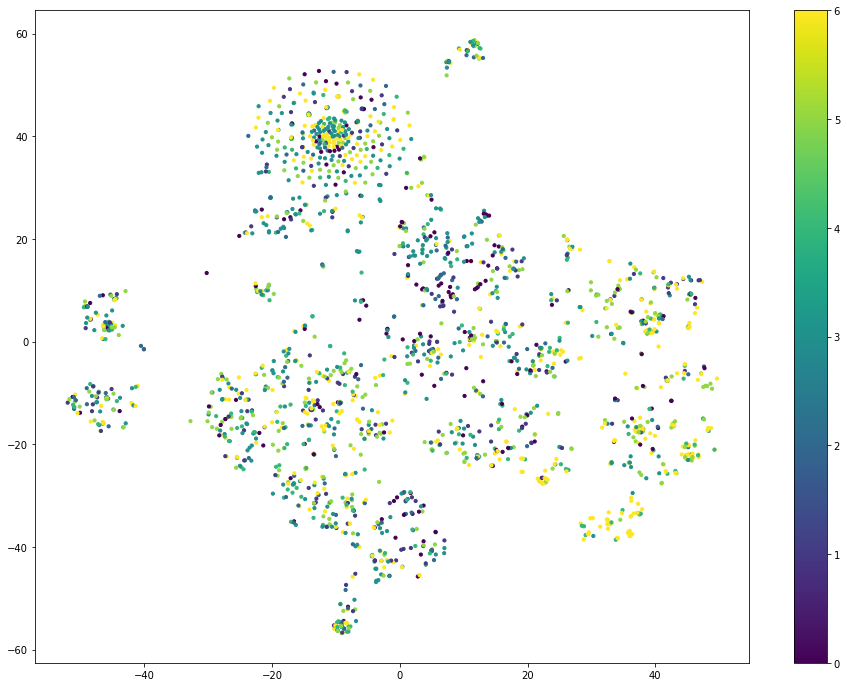

In [306]:
pcamodel = PCA(n_components=50,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

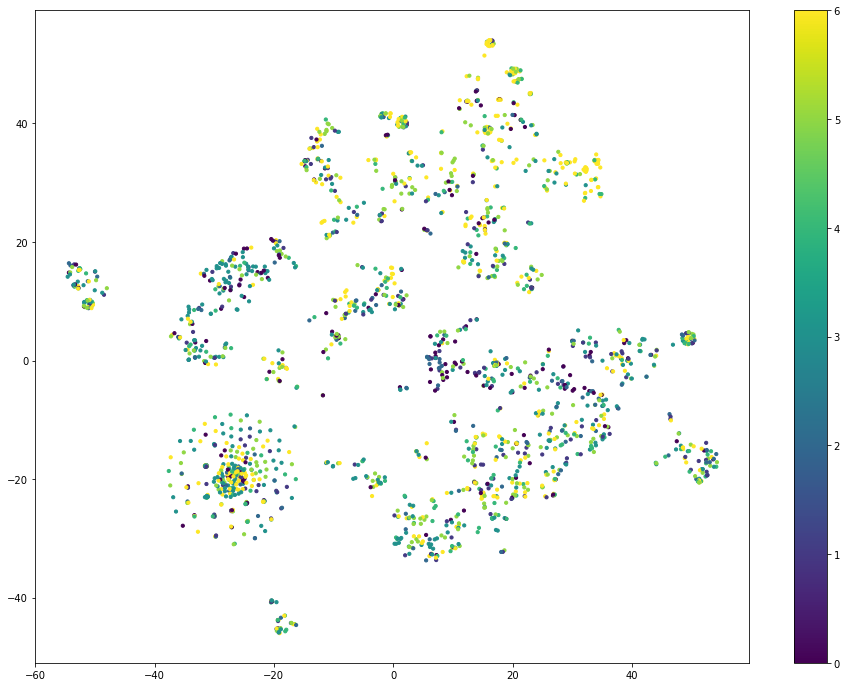

In [307]:
pcamodel = PCA(n_components=10,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

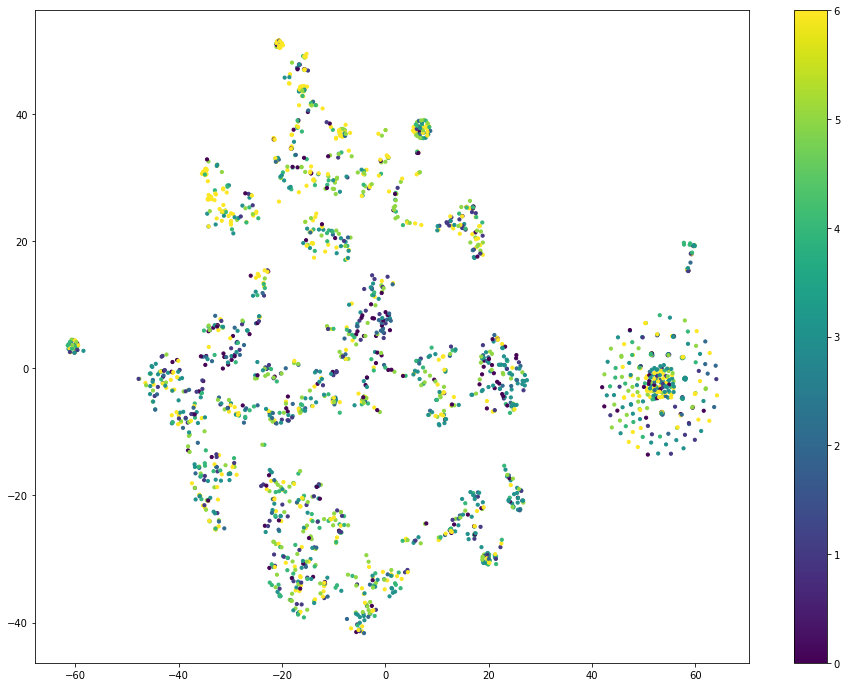

In [308]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

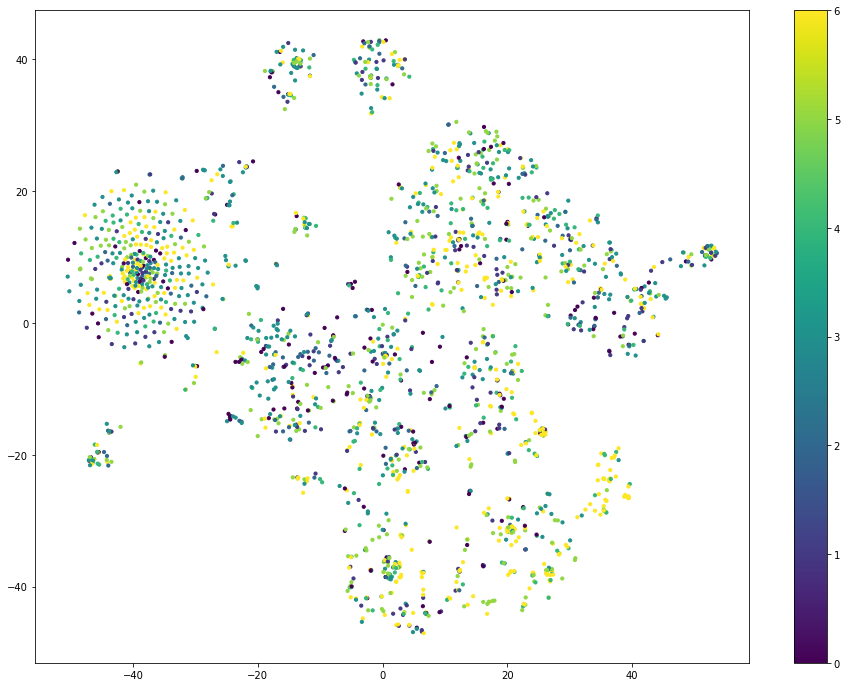

In [312]:
# pcamodel = PCA(n_components=10,random_state=0)
# pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(ddata2)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [309]:
keeper = result2

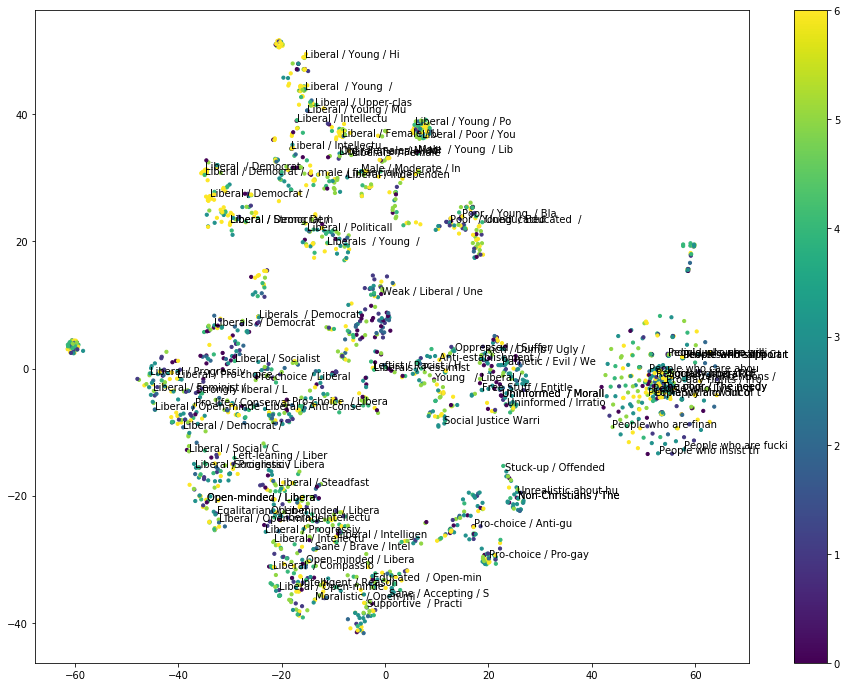

In [337]:
plt.scatter( keeper[:,0]+jitter*np.random.randn(2024), keeper[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

txt = gptdf['GD1'].astype(str) + ' / ' + gptdf['GD2'].astype(str) + ' / ' + gptdf['GD3'].astype(str) + ' / ' + gptdf['GD4'].astype(str)

inds = np.random.randint(0,high=2024,size=100)
for ind in inds:
    plt.text(keeper[ind,0],keeper[ind,1],txt[ind][0:20])

In [318]:
txt

0                                     Liberal open-minded
1                                   Liberal  Progressive 
2                                         Urban Religious
3                                       Liberal Atheistic
4                                      kind compassionate
5                                          Smart educated
6       Poor (you know, because I have no money in the...
7                     Liberal (in a bad way) Out of touch
8       Leftist - any person that believes that the go...
9                                 Open-minded Progressive
10                                Open-minded Progressive
11      I'm a Democrat because I don't want my childre...
12                                     Wealthy Uneducated
13                         Left-wing, liberal progressive
14                I'm OK, you're OK I'm OK, you're not OK
15      Non-Christians The poor, the working poor, the...
16                                          Poor Cautious
17            

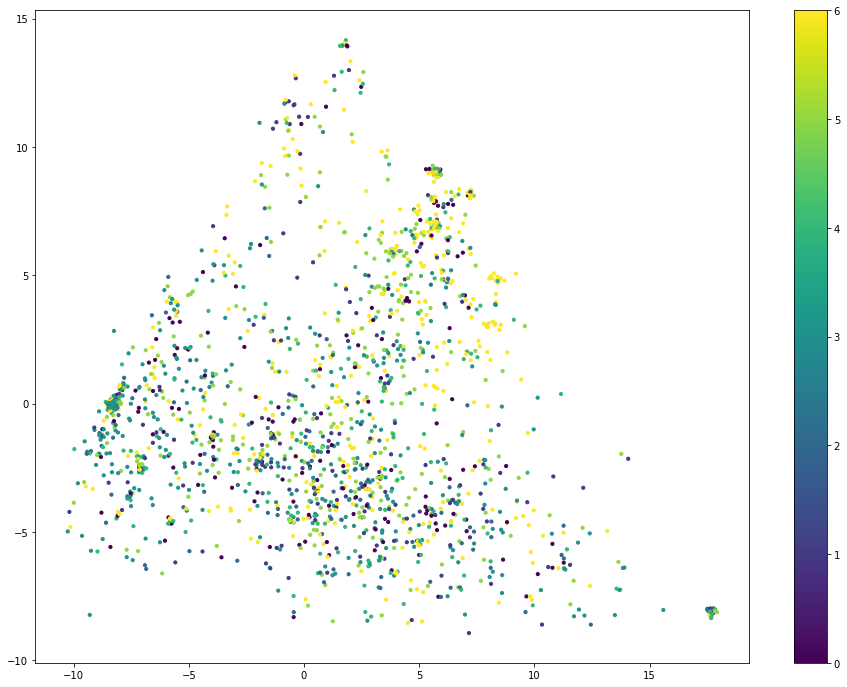

In [305]:
pcamodel = PCA(n_components=2,random_state=0)
result2 = pcamodel.fit_transform(ddata2)

plt.scatter( result2[:,0]+0.1*np.random.randn(2024), result2[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

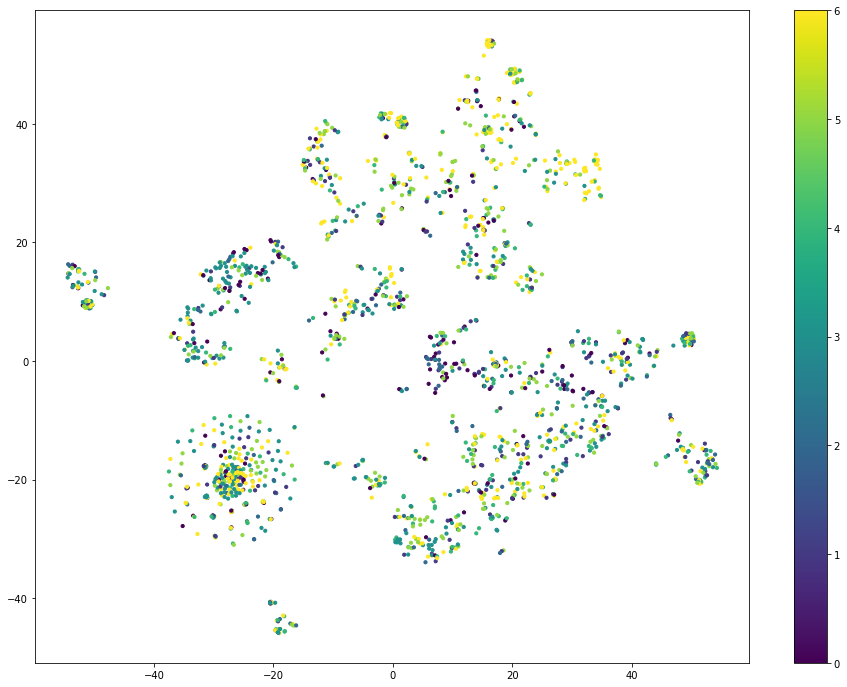

In [188]:
grow = gptdf.iloc[42]
grow

ID                                          R_088ofZ5GPU71Y9L
GD1                         People who are not very religious
GD2                            People who believe in abortion
GD3                           People who are pro-gay marriage
GD4                                    People who are liberal
GR1                                                Religious 
GR2                                             Conservative 
GR3                                                Patriotic 
GR4                                              Pro-business
Inc                                              $50K to $75K
Hisp                                             Not Hispanic
Ideo                                    Slightly conservative
Age                                                        68
PID7                                                   Weak R
PID3_p                                            Republicans
WHITE                                                   White
Gender  

In [186]:
gptdf.columns

Index(['ID', 'GD1', 'GD2', 'GD3', 'GD4', 'GR1', 'GR2', 'GR3', 'GR4', 'Inc',
       'Hisp', 'Ideo', 'Age', 'PID7', 'PID3_p', 'WHITE', 'Gender', 'dkR',
       'dkD', 'GD1glove', 'GD2glove', 'GD3glove', 'GD4glove', 'GR1glove',
       'GR2glove', 'GR3glove', 'GR4glove'],
      dtype='object')

In [213]:
def word_cleaner( word ):
    return str(word).lower().strip()

In [235]:
emba = []
inda = []
wora = []
dema = []

for ind in tqdm( range(gptdf.shape[0]) ):
    grow = gptdf.iloc[ind]
    hrow = ppdf.iloc[ind]

    for ptype in ['D','R']:
        for htype in ['G','H']:
            for wnum in range(4):
                
                if htype == 'H':
                    cleanw = word_cleaner( hrow['H'+ptype+str(wnum+1)] )
                    wemb = hrow['H'+ptype+str(wnum+1)+'glove']
                else:
                    cleanw = word_cleaner( grow['G'+ptype+str(wnum+1)] )
                    wemb = grow['G'+ptype+str(wnum+1)+'glove']
  
                if cleanw == 'liberal' or cleanw == 'conservative' or cleanw==np.nan or cleanw=='':
                    continue
                if np.sum(wemb) == 0:
                    continue
                if np.any(wemb==np.nan):# or wemb==float('nan') or wemb==np.NaN:
                    continue
                if type(wemb)==float:
                    continue

                if htype=='H':
                    dema.append( [hrow['ID'],htype,ptype,hrow['Ideo'],hrow['Gender'],hrow['PID7'],hrow['Inc']] )
                else:
                    dema.append( [grow['ID'],htype,ptype,grow['Ideo'],grow['Gender'],grow['PID7'],grow['Inc']])
                wora.append( cleanw )
                emba.append( wemb )
                inda.append( ind )
        













  0%|          | 0/2024 [00:00<?, ?it/s]











  5%|▍         | 97/2024 [00:00<00:01, 966.93it/s]











  9%|▉         | 188/2024 [00:00<00:01, 946.95it/s]











 14%|█▍        | 280/2024 [00:00<00:01, 936.85it/s]











 19%|█▉        | 381/2024 [00:00<00:01, 955.87it/s]











 24%|██▍       | 484/2024 [00:00<00:01, 974.85it/s]











 29%|██▉       | 593/2024 [00:00<00:01, 1005.09it/s]











 35%|███▍      | 699/2024 [00:00<00:01, 1018.88it/s]











 39%|███▉      | 796/2024 [00:00<00:01, 889.13it/s] 











 44%|████▍     | 893/2024 [00:00<00:01, 910.65it/s]











 49%|████▊     | 983/2024 [00:01<00:01, 896.16it/s]











 53%|█████▎    | 1078/2024 [00:01<00:01, 910.07it/s]











 58%|█████▊    | 1180/2024 [00:01<00:00, 938.73it/s]











 63%|██████▎   | 1283/2024 [00:01<00:00, 961.39it/s]











 68%|██████▊   | 1384/2024 [00:01<00:00, 974.30it/s]











 74%|███████▎  | 1488/2024 [00:01<00:00, 990.72i

In [242]:
emb_mat = np.vstack(emba)

In [243]:
emb_mat.shape

(25880, 300)

In [257]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(emb_mat)

model3 = TSNE(n_components=2,random_state=0)
result3 =model3.fit_transform(pcaresult)


In [250]:
pid_mapper = {
    'Strong R':0,
    'Weak R':1,
    'Lean R':2,
    'Ind':3,
    'Lean D':4,
    'Weak D':5,
    'Strong D':6,
    np.nan:3,
}

ideo_mapper = {
    'Extremely Liberal':6,
    'Liberal':5,
    'Slightly liberal':4,
    "Moderate/Haven't thought about it":3,
    'Slightly conservative':2,
    'Conservative':1,
    'Extremely conservative':0,
    np.nan:3,
}

In [252]:
%matplotlib inline

In [253]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

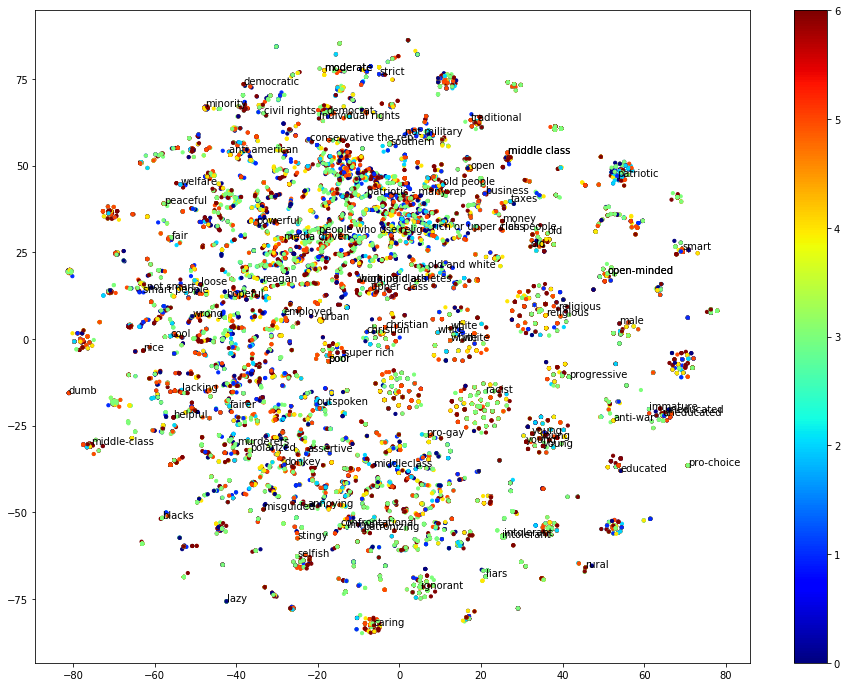

In [259]:
jitter = 0.0
NW = emb_mat.shape[0]


colors = [ pid_mapper[x[5]] for x in dema ] 
#colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result3[:,0]+jitter*np.random.randn(NW), result3[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result3[ind,0],result3[ind,1],wora[ind][0:20])

In [263]:
tmpdf = pd.DataFrame( emb_mat )
tmpdf.to_csv('./emb_data.csv',sep='\t')

In [266]:
f = open('./word_list.txt','w')
print("word",file=f)
for w in wora:
    print( w, file=f)
f.close()

In [295]:
pairs = [
    ['kind','heartless'],
    ['wealthy','impovershed'],
    ['racist','egalitarian'],
    ['arrogant','humble'],
    ['lazy','industrious'],
    ['generous','stingy'],
    ['intelligent','stupid'],
    ['happy','miserable'],
    ['religious','atheist']
]

projmat = np.zeros((len(pairs),300))
for ind, p in enumerate(pairs):
    projmat[ind,:] = np.atleast_2d( glove_word(p[0],glove_dic=glove_dic)-glove_word(p[1],glove_dic=glove_dic) )

lowdmat = np.dot( emb_mat, projmat.T )

In [299]:
model4 = TSNE(n_components=2,random_state=0)
result4 =model4.fit_transform(lowdmat)

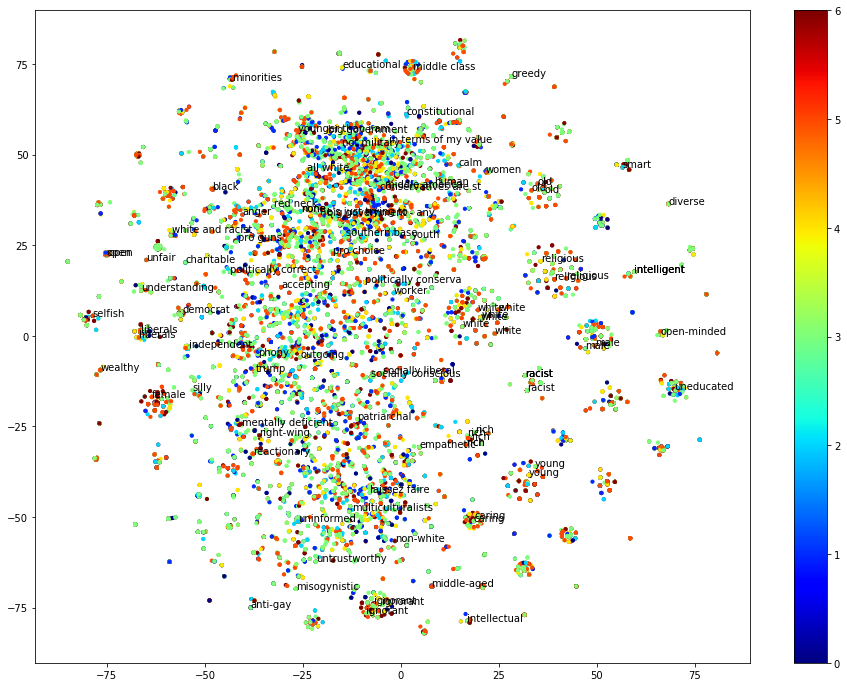

In [302]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0
NW = emb_mat.shape[0]

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result4[:,0]+jitter*np.random.randn(NW), result4[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result4[ind,0],result4[ind,1],wora[ind][0:20])

In [303]:
tmp = np.atleast_1d(wora)

In [312]:
np.sum( np.logical_and( tmp=='racist', np.atleast_1d(colors)==0) )

12

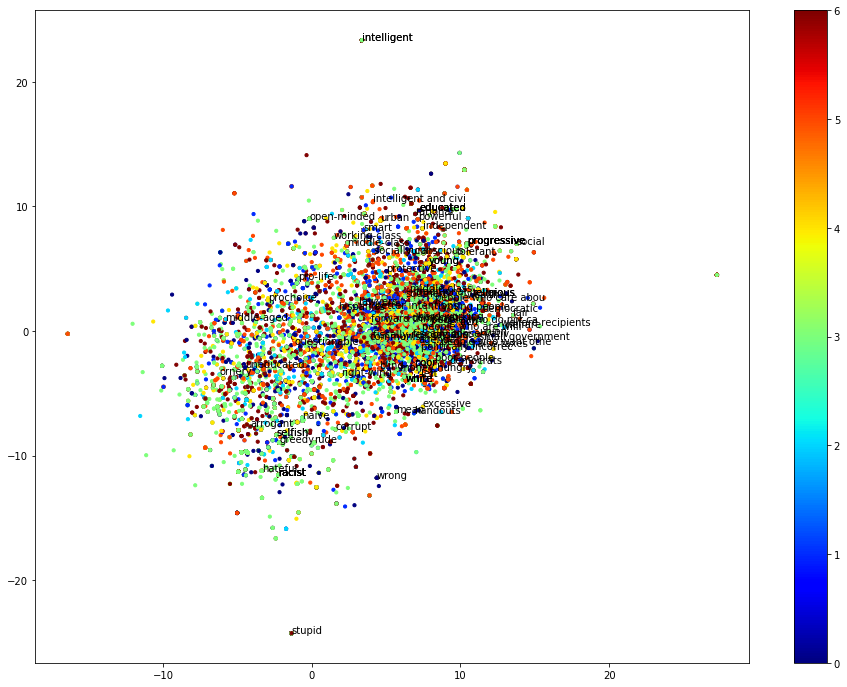

In [281]:
jitter = 0.0
NW = emb_mat.shape[0]

colors = [ pid_mapper[x[5]] for x in dema ] 
#colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( c1.ravel()+jitter*np.random.randn(NW), c2.ravel()+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(c1[ind,0],c2[ind,0],wora[ind][0:20])

<Figure size 1152x288 with 0 Axes>

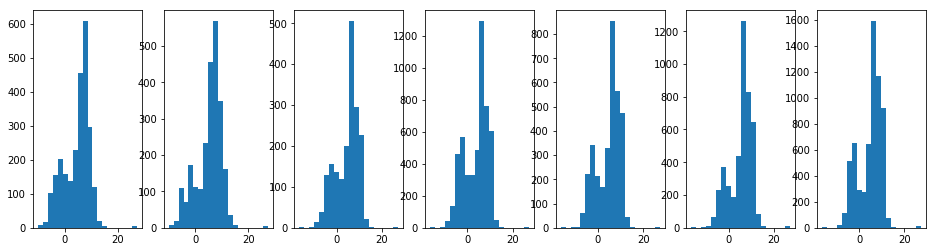

In [294]:
plt.rcParams['figure.figsize'] = [16,4]
plt.figure()

pids = [ pid_mapper[x[5]] for x in dema ] 
targ_dems = [ x[2] == 'D' for x in dema ]
targ_reps = [ x[2] == 'R' for x in dema ]
is_human = [ x[1] == 'H' for x in dema ]
is_gpt3  = [ x[1] == 'G' for x in dema ]

plt.rcParams['figure.figsize'] = [16,4]
plt.figure()

for pid in range(7):
    plt.subplot(1,7,pid+1)
    #plt.hist( c1[ np.logical_and(np.atleast_1d(colors)==pid,targ_dems),0], bins=20 )
    #plt.hist( c1[ np.logical_and(np.atleast_1d(colors)==pid,targ_reps),0], bins=20 )
    plt.hist( c1[np.atleast_1d(colors)==pid,0], bins=20 )



In [313]:
pcamodel = PCA(n_components=2,random_state=0)
pcaresult = pcamodel.fit_transform(lowdmat)

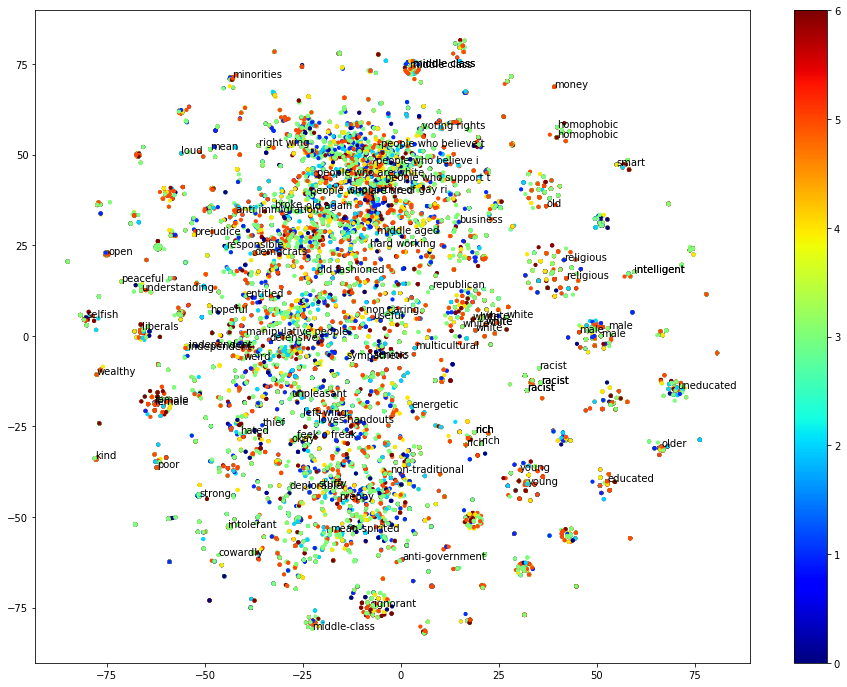

In [314]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0
NW = emb_mat.shape[0]

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result4[:,0]+jitter*np.random.randn(NW), result4[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result4[ind,0],result4[ind,1],wora[ind][0:20])